
# Project: Investigate a Dataset (What features is correlated to no-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
**Brief**:

In this project, I am trying to investigate the [No-show appointments] Dataset, this dataset collects information from 100k medical appointments in Brazil, and it records whether a patient shows up for his/her medical appointment or not, and it also collects different features such as a patient's gender, age, what day the patient set up the appointments, the location of the hospital, whether or not the patient is enrolled in welfare program, and some other features.

I am trying to know what features is correlated to a patient's decision to show up for a medical appointment, specifically, I want to access whether age, gender, work day of their appointment, and the interval between appointment day and the day they schedule the appointment are related to the show up of medical appointments.


In [620]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
# First, I import all packages I plan to use, if there is any package I didn't import here, I will do that later


<a id='wrangling'></a>
## Data Wrangling

In [621]:
# Load data and check how it looks
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(1) 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [622]:
df.describe()# assess some statistics of each column

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


It looks like the age column has some outliners, since a patient's age should be within 0 and 100, so code below is going to filter the data.

In [623]:
df=df[(df['Age']<100) & (df['Age']>0)]

In [624]:
#check if the age has been properly filtered
df.Age.describe()

count    106976.000000
mean         38.309004
std          22.456395
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max          99.000000
Name: Age, dtype: float64

In [625]:
df.info()# check the data type of each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106976 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         106976 non-null float64
AppointmentID     106976 non-null int64
Gender            106976 non-null object
ScheduledDay      106976 non-null object
AppointmentDay    106976 non-null object
Age               106976 non-null int64
Neighbourhood     106976 non-null object
Scholarship       106976 non-null int64
Hipertension      106976 non-null int64
Diabetes          106976 non-null int64
Alcoholism        106976 non-null int64
Handcap           106976 non-null int64
SMS_received      106976 non-null int64
No-show           106976 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.2+ MB


In [626]:
sum(df.duplicated()) # check if there is any duplicates 

0

In [627]:
df.isnull().sum().sum() #check if there is any null values

0

In [628]:
df.nunique() #check the unique values of each column

PatientId          59742
AppointmentID     106976
Gender                 2
ScheduledDay      100298
AppointmentDay        27
Age                   99
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


## Initial conclusion after accessing the data##


There is no missing value, no null value, no duplicates, and also the data type for each column looks right, so it seems that the data had been cleaned already, though a few cleaning steps needed to make the data easier to read and analyze, such as the column name has typos, appointment day and scheduled day's data type need to be converted before any math operations, since I need to have one additional column called 'Dayinterval', which uses appointment day subtract scheduled day.



### Data Cleaning 
Rename columns, create work day of appointment day column, convert AppointmentDay and ScheduledDay's data type and create a column represents the interval between appointment day and scheduled day.

In [629]:

df=df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap','No-show':'No_show'})# rename a few column names to make them easier to understand
df.head(1)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [630]:
df['AppointmentDay_weekday']=pd.to_datetime(df['AppointmentDay']).dt.dayofweek
# Create one addtional column to covert the appointment  day to day of week


In [631]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date

df['ScheduledDay']   = pd.to_datetime(df['ScheduledDay']).dt.date
#convert the string to date type for appointmentDay and ScheduledDay before substract them

In [632]:
df['Dayinterval']=(df['AppointmentDay']-df['ScheduledDay'])/np.timedelta64(1, 'D')
#convert the dayinterval's data type to float in order to anlayse 

In [633]:
df.describe()#Assess the data again after cleaning

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,AppointmentDay_weekday,Dayinterval
count,1.069760e+05,1.069760e+05,106976.000000,106976.000000,106976.000000,106976.000000,106976.000000,106976.000000,106976.000000,106976.000000,106976.000000
mean,1.472785e+14,5.675432e+06,38.309004,0.101041,0.203784,0.074250,0.031409,0.022921,0.323278,1.860427,10.166794
std,2.558181e+14,7.133383e+04,22.456395,0.301385,0.402812,0.262179,0.174421,0.163960,0.467730,1.371451,15.263781
min,3.920000e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.173122e+12,5.640488e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.171765e+13,5.680740e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000
75%,9.433650e+13,5.725632e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,14.000000
max,9.999820e+14,5.790484e+06,99.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,179.000000


From above data description, the Dayinterval has outliners, a patient must schedule an appointment before the appointment day, so only keep those appointment day>=schedule day, code below will filter the data.

In [634]:

df=df[df['AppointmentDay']>=df['ScheduledDay']]

<a id='eda'></a>
## Exploratory Data Analysis









Before stepping into the analysis, I firstly want to check the limitaions of the datset and then I want to know the distribution of each column's values.

Check the the limitation of the dataset

In [635]:
#check the unique values of each column
for c in df.columns:
    print(c,'unique value:',df[c].nunique())

PatientId unique value: 59742
AppointmentID unique value: 106971
Gender unique value: 2
ScheduledDay unique value: 110
AppointmentDay unique value: 27
Age unique value: 99
Neighbourhood unique value: 81
Scholarship unique value: 2
Hypertension unique value: 2
Diabetes unique value: 2
Alcoholism unique value: 2
Handicap unique value: 5
SMS_received unique value: 2
No_show unique value: 2
AppointmentDay_weekday unique value: 6
Dayinterval unique value: 129


It seems that very limited neighborhoods were being collected, only 89 unique values. Also, there are only 27 unique appointment day, so the data are being narrowly collected for a time period, same for scheduled day, so need to check neighbor value, appointment day and scheduled day's span.

In [636]:
print(df['Neighbourhood'].unique())
columns=['AppointmentDay','ScheduledDay']
for c in columns:
    print (c,'span',df[c].max()-df[c].min())

['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM'
 'JARDIM CAMBURI' 'MARIA ORTIZ' 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA'
 'ILHA DE SANTA MARIA' 'JUCUTUQUARA' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO'
 'BELA VISTA' 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ'
 'UNIVERSITÁRIO' 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO'
 'PARQUE MOSCOSO' 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA'
 'ARIOVALDO FAVALESSA' 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC'
 'CONSOLAÇÃO' 'SÃO BENEDITO' 'PRAIA DO CANTO' 'BOA VISTA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'MORADA DE CAMBURI' 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE'
 'JESUS DE NAZARETH' 'SANTA LUÍZA' 'SANTA TEREZA' 'CRUZAMENTO'
 'ILHA DO PRÍNCIPE' 'ROMÃO' 'ILHA DAS CAIEIRAS' 'COMDUSA' 'SANTA CECÍLI

So the Appointment days only have a span of 40 day, scheduled days have a span of 211 days. Whatever conclusions might hold true for this narrow time period, but applying them to a general pictures is risky.

Now, I begin to check each column's histogram to see their value distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9de58cd588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9de30ee588>]], dtype=object)

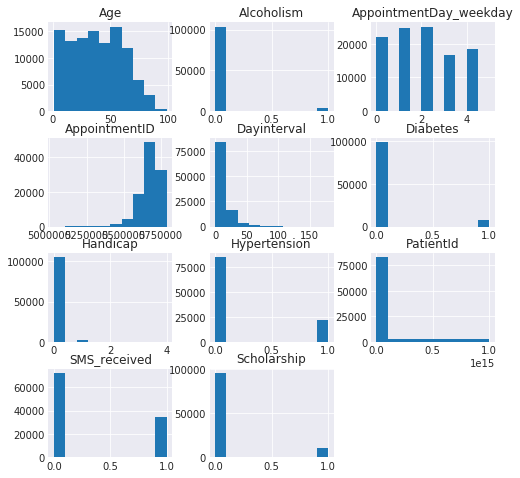

In [637]:
df.hist(figsize=(8,8))

In [638]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106971 entries, 0 to 110526
Data columns (total 16 columns):
PatientId                 106971 non-null float64
AppointmentID             106971 non-null int64
Gender                    106971 non-null object
ScheduledDay              106971 non-null object
AppointmentDay            106971 non-null object
Age                       106971 non-null int64
Neighbourhood             106971 non-null object
Scholarship               106971 non-null int64
Hypertension              106971 non-null int64
Diabetes                  106971 non-null int64
Alcoholism                106971 non-null int64
Handicap                  106971 non-null int64
SMS_received              106971 non-null int64
No_show                   106971 non-null object
AppointmentDay_weekday    106971 non-null int64
Dayinterval               106971 non-null float64
dtypes: float64(2), int64(9), object(5)
memory usage: 13.9+ MB


Gender and No show were not being plotted since their data types are string, but  I want to use pie chart to see how the values are distributed.

In [639]:
#Get the counts of female and male patients
femalecount=df.groupby('Gender').count()['PatientId']['F']
malecount=df.groupby('Gender').count()['PatientId']['M']

Text(0.5,1,'Percentage of Male and Female Patients being collected')

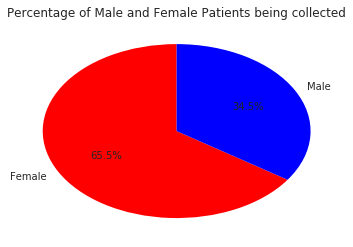

In [640]:
label=['Female','Male']
color=['r','b']
plt.pie([femalecount,malecount],labels=label,colors=color,startangle=90,autopct='%.1f%%')
plt.title('Percentage of Male and Female Patients being collected')

In [641]:
show=df.groupby('No_show').count()['PatientId']['No']
noshow=df.groupby('No_show').count()['PatientId']['Yes']

Text(0.5,1,'Percentage of show up and no show up')

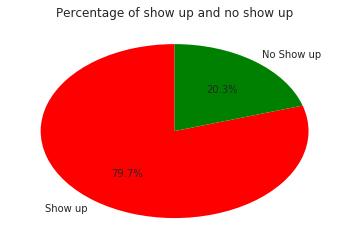

In [642]:
label=['Show up','No Show up']
color=['r','g']
plt.pie([show,noshow],labels=label,colors=color,startangle=90,autopct='%.1f%%')
plt.title('Percentage of show up and no show up')

### Research Question 1 (Are age and the show up related?)

I am going to define bar plot function since I need to use twice

In [643]:
def barplot(x):
    plt.bar([1,2],x,tick_label=['Show up','No show up'])
   

In [644]:
age=df.groupby('No_show').Age.mean()

Text(0,0.5,'Average Age')

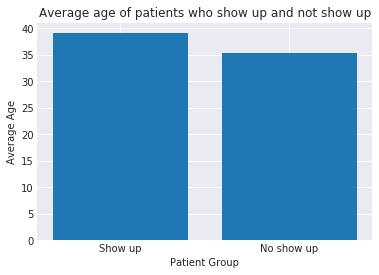

In [645]:
barplot(age)
plt.xlabel('Patient Group')
plt.title('Average age of patients who show up and not show up')
plt.ylabel('Average Age')

### Conclusion for question 1
A patient' age is correlated to his/her show up performance for medical appointments. Show up group's patients' average age is older than no show up group.

### Research Question 2 (Are Dayinterval and the show up correlated?)

In [646]:
dayinterval=df.groupby('No_show').Dayinterval.mean()

Text(0.5,0,'Patient group')

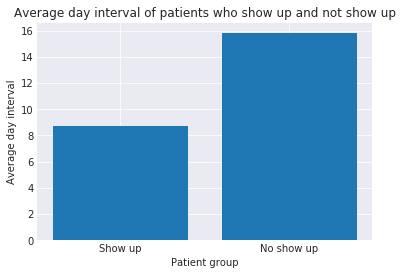

In [647]:
barplot(dayinterval)
plt.title('Average day interval of patients who show up and not show up')
plt.ylabel('Average day interval')
plt.xlabel('Patient group')

## Conclusion for question 2
Show up group's patients' average interval between the day the schedule appointments and appointment day is less than no show up group.

### Research Question 3  (Is a patient's gender and the show up related? )

In [648]:

#get counts for each gender and show up/no show 
Gendercounts=df.groupby(['Gender','No_show']).count()['PatientId']
Gendercounts


Gender  No_show
F       No         55837
        Yes        14269
M       No         29462
        Yes         7403
Name: PatientId, dtype: int64

In [649]:
#create the total counts for each gender
Gender_totals=df.groupby('Gender').count()['PatientId']
Gender_totals


Gender
F    70106
M    36865
Name: PatientId, dtype: int64

In [650]:
#create each gender's proportion in show up and no show up
female_proportions=Gendercounts['F']/Gender_totals['F']
male_proportions=Gendercounts['M']/Gender_totals['M']


In [651]:
female_proportions

No_show
No     0.796465
Yes    0.203535
Name: PatientId, dtype: float64

([<matplotlib.axis.XTick at 0x7f9de2ce9470>,
 <a list of 2 Text xticklabel objects>)

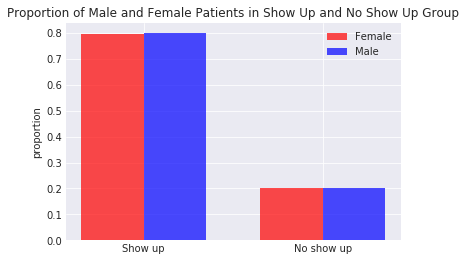

In [652]:
location=np.arange(2)
width=0.35
#plot each gender's proportions in show up and no show up
plt.bar(location,female_proportions,width,color='red',alpha=0.7,label='Female')
plt.bar(location+width,male_proportions,width,color='blue',alpha=0.7,label='Male')
labellocation=location+width/2
label=['Show up','No show up']
plt.legend()
plt.title('Proportion of Male and Female Patients in Show Up and No Show Up Group')
plt.ylabel('proportion')
plt.xticks(labellocation,label)

## Conclusion for question 3

Same proportion of male and female show up for appointments, which means that the gender and the show up is not closely related.


### Research Question 4  (Is the work day of appointment and show up related?)

In [653]:

#get counts for each week day and show up/no show 
workdaycounts=df.groupby(['AppointmentDay_weekday','No_show']).count()['PatientId']
workdaycounts

AppointmentDay_weekday  No_show
0                       No         17387
                        Yes         4513
1                       No         19804
                        Yes         5022
2                       No         20141
                        Yes         4947
3                       No         13414
                        Yes         3241
4                       No         14523
                        Yes         3940
5                       No            30
                        Yes            9
Name: PatientId, dtype: int64

In [654]:
#create the total counts for each workday from Monday to Satarday
workdaytotal=df.groupby('AppointmentDay_weekday').count()['PatientId']


In [655]:
#create each work day's proportion in show up and no show up

Mon=workdaycounts[0]/workdaytotal[0]
Tue=workdaycounts[1]/workdaytotal[1]
Wed=workdaycounts[2]/workdaytotal[2]
Thu=workdaycounts[3]/workdaytotal[3]
Fri=workdaycounts[4]/workdaytotal[4]
Sat=workdaycounts[5]/workdaytotal[5]

([<matplotlib.axis.XTick at 0x7f9de2ccc400>,
 <a list of 2 Text xticklabel objects>)

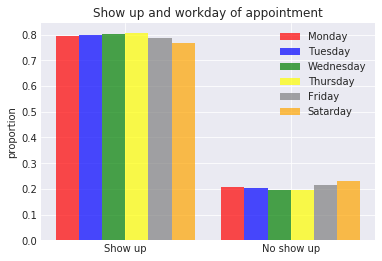

In [656]:
#plot each work day's proportions in show up and no show up and see the difference
location=np.arange(0,5,2.5)
width=0.35

plt.bar(location,Mon,width,color='red',alpha=0.7,label='Monday')
plt.bar(location+width,Tue,width,color='blue',alpha=0.7,label='Tuesday')
plt.bar(location+width*2,Wed,width,color='Green',alpha=0.7,label='Wednesday')
plt.bar(location+width*3,Thu,width,color='Yellow',alpha=0.7,label='Thursday')
plt.bar(location+width*4,Fri,width,color='gray',alpha=0.7,label='Friday')
plt.bar(location+width*5,Sat,width,color='ORANGE',alpha=0.7,label='Satarday')
plt.title('Show up and workday of appointment')
labellocation=location+width*5/2
label=['Show up','No show up']
plt.legend()
plt.ylabel('proportion')

plt.xticks(labellocation,label)


## Conclusion for question 4
The work day of the appointment is related to show up. Friday and Saturday’s appointments has less show up compared with other work days.

<a id='conclusions'></a>
## Conclusions

1. A patient' age is correlated to his/her show up performance for medical appointments. Show up group's patients' average age is older than no show up group. 

2. Show up group's patients' average interval between the day they schedule appointments and appointment day is less than no show up group. 

3. Same proportion of male and female show up for appointments, which means that the gender and the show up is not closely related. 

4. The work day of the appointment is related to show up. Friday and Saturday’s appointments has less show up compared with other work days.

## Limitations
As stated above, the Appointment days only have a span of 40 day, scheduled days have a span of 211 days and also only 80+ neighborhood were studied, whatever conclusions might hold true for this narrow time period, but applying them to a general pictures is risky.

Reference:N/A

In [618]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0